In [3]:
from src.genetic.arbitrage import Arbitrage, Population, Individual

import matplotlib.pyplot as plt
import matplotlib

In [2]:
import pickle
with open('/home/joaogeraldo/TCC/fetch-api/src/genetic/population.data', 'rb') as file:
    population: Population = pickle.load(file)

AttributeError: 'Population' object has no attribute 'normalize_fitness_population'

In [ ]:
def mostrar():
    count = 1
    for front in population.pareto_fronts:
        print(f'FRONT: [{count}]')
        for i in front:
            print(f'{i.fitness_normalized}')
            for d in i.dominated_solutions:
                print(f' ---> {d.fitness_normalized} {d.crowding_distance} [{d.dominated_by_count}]')
            print('---------------------------------------------------------------')
        count += 1

In [33]:
def plot(x, y):
    
    plt = matplotlib.pyplot

    # Crie um array de valores de 0 a 1 com espaçamento de 0.1
    
    plt.xlim(0, 1.05)
    plt.ylim(0, 1.05)

    # Defina o tamanho da figura (largura x altura) em polegadas
    # largura_figura = 20  # Ajuste a largura
    # altura_figura = 6    # Ajuste a altura
    # plt.figure(figsize=(largura_figura, altura_figura))
    
    plt.xlabel('Profit')
    plt.ylabel('Dispersation')
    
    plt.scatter(x, y)
    plt.grid(True)
    plt.show()


In [ ]:
profit = [i.fitness_normalized[0] for i in population.solutions]
dispersation = [i.fitness_normalized[1] for i in population.solutions]
plot(profit, dispersation)


In [ ]:
for x,y in population.solutions_history:
    print(f'x --> {x} :::: y --> {y}')

In [ ]:
for i in population.solutions:
    i.print_chromossome()

In [4]:
arbitrages = []
arbitrages.append(Arbitrage("a86e2d9332c3ae6995a042ed4b95fe2b", 59664,	59631, "UNIBET_EU", "ONEXBET",	2.0,	2.02, 0.49))
arbitrages.append(Arbitrage("a86e2d9332c3ae6995a042ed4b95fe2b", 59664,	59655, "UNIBET_EU", "PINNACLE",	2.0,	2.03, 0.73))
arbitrages.append(Arbitrage("45c50eab0a379bd74d9ad5879ee50595", 94745,	94783, "ONEXBET", "UNIBET_EU",	1.9,	2.12, 0.19))
arbitrages.append(Arbitrage("45c50eab0a379bd74d9ad5879ee50595", 94745,	94791, "ONEXBET", "MATCHBOOK",	1.9,	2.14, 0.63))
arbitrages.append(Arbitrage("ff03cc32e860ac5cd4c907381443986f", 94795,	94833, "ONEXBET", "UNIBET_EU",	2.12,	1.91, 0.47))
arbitrages.append(Arbitrage("ff03cc32e860ac5cd4c907381443986f", 94840,	94833, "MATCHBOOK", "UNIBET_EU",	2.12,	1.91, 0.47))
arbitrages.append(Arbitrage("6454621f739da2ded2aaae7694e8835a", 50050,	50043, "ONEXBET", "NORDICBET",	2.08,	1.95, 0.64))
arbitrages.append(Arbitrage("6454621f739da2ded2aaae7694e8835a", 50771,	50764, "ONEXBET", "NORDICBET",	2.08,	1.95, 0.64))
arbitrages.append(Arbitrage("6454621f739da2ded2aaae7694e8835a", 51606,	51599, "ONEXBET", "NORDICBET",	2.08,	1.95, 0.64))
arbitrages.append(Arbitrage("6454621f739da2ded2aaae7694e8835a", 56150,	56143, "ONEXBET", "NORDICBET",	2.08,	1.95, 0.64))
arbitrages.append(Arbitrage("6454621f739da2ded2aaae7694e8835a", 56932,	56925, "ONEXBET", "NORDICBET",	2.08,	1.95, 0.64))
arbitrages.append(Arbitrage("6454621f739da2ded2aaae7694e8835a", 59265,	59258, "ONEXBET", "NORDICBET",	2.08,	1.95, 0.64))

In [5]:
population = Population(arbitrages, 100, 50)

In [6]:
import datetime
def get_file_name(geracoes):
    data_e_hora_atual = datetime.datetime.now()
    return f'{data_e_hora_atual.strftime("%Y_%m_%d_[%H:%M:%S]")}_[G:{geracoes}].gif'


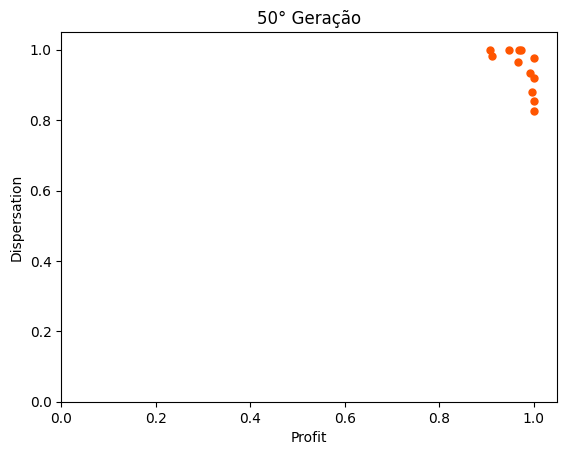

In [7]:
from matplotlib.animation import PillowWriter

metadata = dict(title='NSGA-II', artist='João Geraldo')
writer = PillowWriter(fps=2, metadata=metadata)
fig = plt.figure()
# l, = plt.plot([], [], 'ko', markersize=5, color='lightblue')
l, = plt.plot([], [], 'ko', markersize=5)  # Apenas 'ko' para a cor preta
plt.setp(l, color='#FF5500')  # Cor laranja

plt.xlim(0, 1.05)
plt.ylim(0, 1.05)
plt.xlabel('Profit')
plt.ylabel('Dispersation')
file_name = get_file_name(population.generations)

with writer.saving(fig, file_name, 100):
    for i in range(len(population.solutions_history)):
        plt.title(f'{i}° Geração')
        l.set_data(population.solutions_history[i][0],[population.solutions_history[i][1]])
        writer.grab_frame()

In [47]:
import numpy as np
import pygmo as pg

reference_point = [1, 1]
x_plot = []
y_plot = []
for geration, front in population.pareto_history_front:
    print(geration)
    print([i.fitness_normalized for i in front])
    front_np = np.array([i.fitness_normalized for i in front])
    hypervolume = pg.hypervolume(front_np).compute(reference_point)
    print(hypervolume)
    x_plot.append(geration)
    y_plot.append(hypervolume)
# [i[1][1].fitness_normalized for i in population.pareto_history_front]

0
[[0.8803, 1.0], [0.9414, 0.6319], [0.9034, 0.997], [1.0, 0.621]]
0.021684659999999994
0
[[1.0, 0.621], [0.9657, 1.0], [0.9414, 0.6319], [1.0, 0.9137]]
0.021570659999999995
1
[[0.9657, 1.0], [1.0, 0.569], [0.9683, 0.7939], [1.0, 0.621], [0.887, 1.0], [0.923, 0.926], [0.9342, 0.9036], [1.0, 0.569]]
0.01064940999999999
2
[[0.9657, 1.0], [1.0, 0.5872], [0.9984, 0.711], [0.9492, 1.0], [0.9617, 0.8622], [1.0, 0.569], [0.887, 1.0], [0.9683, 0.7939], [0.9683, 0.8193], [1.0, 0.621], [1.0, 0.569], [1.0, 0.5872], [0.9683, 0.8193]]
0.007575489999999999
3
[[0.9657, 1.0], [1.0, 0.8511], [0.9492, 1.0], [0.887, 1.0], [0.9544, 1.0], [0.9864, 0.98], [0.9617, 0.8622], [0.9544, 1.0]]
0.005277740000000002
4
[[0.9657, 1.0], [1.0, 0.8511], [0.8861, 1.0], [0.887, 1.0], [0.9718, 0.9462], [0.9603, 0.9613], [1.0, 0.8278], [0.8861, 1.0]]
0.001962209999999997
5
[[1.0, 0.8511], [0.898, 1.0], [1.0, 0.8278], [1.0, 0.9974]]
0.0
6
[[1.0, 0.8511], [0.898, 1.0], [0.9791, 0.9317], [1.0, 0.8278], [0.9972, 0.8057], [1.0, 

In [46]:
reference_point = [1, 1]
fronts = np.array([[0.8803, 1.0], [0.9414, 0.6319], [0.9034, 0.997], [1.0, 0.621]])
volume = pg.hypervolume(fronts).compute(reference_point)
print(volume)

0.021684659999999994


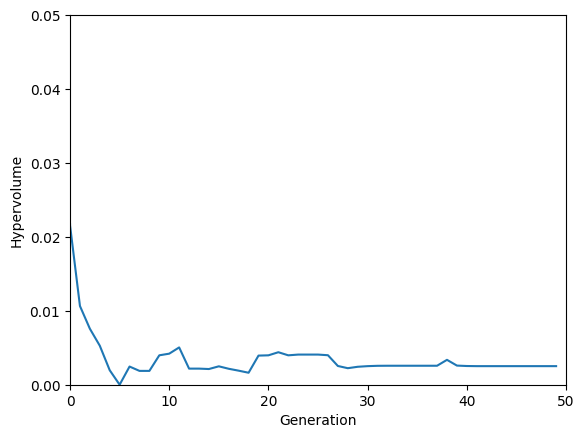

In [40]:
hv = matplotlib.pyplot
hv.xlabel('Generation')
hv.ylabel('Hypervolume')
hv.xlim(0, 50)
hv.ylim(0, 0.05)
hv.plot(x_plot, y_plot)
# hv.grid(True)
hv.show()